# EDA (Data Exploration)

### What is EDA?
Exploratory Data Analysis (EDA) is essential for understanding our datasets as it reveals underlying trends in our data, transforming it from messy numbers into clear insights. Many people working in data science roles report that this is the process that makes up most of their responsibilities!

EDA  is the process of familiarizing ourselves with a new dataset before performing more advanced analysis or modeling. Through iterative EDA, we can better understand our variables, identify problems in the dataset, and discover potential hypotheses.


### What should we look for during EDA?

When performing EDA, you can reference a "checklist" of things to consider when examining your data.

**Getting to know the data table columns and their types**
*   Each column represents a variable in your data, and you should start by identifying what data / storage type the columns are. Data types tell you how each variable is stored in memory, and some data types include integers, floating points, booleans, and strings. You should also determine if columns represent quantitative or categorical variables.

**Detecting missing values and outliers**
* Identify and handle missing data carefully, noting where and why values are missing; avoid blindly dropping records since this can introduce bias. Instead, consider strategies like keeping `NaNs` or using imputation only after understanding the cause of missingness.
* Imputation is the process of inferring missing values using other data available in the dataset. Here are some common imputation methods: average imputation (replace missing values with the average value for that field), regression imputation (develop a model to predict missing values and replace with the predicted value from the model), and random imputation (replace missing values with random values).

**Looking at summaries, distributions, and relationships between variables**
* How is the data in each variable spread? Summary statistics like the mean or standard deviation and visualizations can better clarify the shape of your data. Visualizations can be especially helpful in exploring any potential relationships between two variables or columns in your data.

### Basic EDA with Pandas
EDA is most commonly performed with Pandas, a data transformation language. Below are some common Pandas notation and functions used during the EDA process.

**Getting to know the data table columns and their types**
* `import pandas as pd` : Pandas is shortened to pd, just like how NumPy is shorted to np.
* `df` refers to "dataframe," which is essentially the term to refer to tables.
* `pd.read_csv('INSERT YOUR FILE NAME.csv')` Most datasets are comma-separated values (CSV) files, and this function loads a CSV file into an easily-manipulated dataframe format.
* `df.shape` Returns the # rows x # columns in the dataframe
* `df.dtypes` Returns the data types for each column

**Manipulating the data**
* `df.sort_values(by='COL', axis, ascending)` Sorts the dataframe by the value named `'COL'`. `axis=0` (default) sorts by columns, while `axis=1` sorts by rows.
* `df.groupby(by='COL')` "Categorizes" the table based on unique values in the column `'COL'`, applying a function to the collected values.
* `pd.merge()` Combines two or more dataframes together based on common values in columns

**Detecting missing values and outliers**
* `df.isna()` Returns a dataframe with `True` / `False` values indicating whether a value is missing (None or NaN)
* `df.dropna()` Drops rows with missing data
* `df.fillna(VALUE)` Fills missing values with the passed in `VALUE`

**Looking at summaries, distributions, and relationships between variables**
* `df.describe()` Returns summary statistics for all numeric columns
* `df.mean()` `df.min()` `df.max()` Return the mean, min, and max for the entire overall dataframe. Use `df['col'].mean()` for the mean of the specified column.

# Data Visualization

### Why do we need to visualize data?

EDA makes heavy use of visualizations, which have a key role in both *uncovering* useful observations and later *communicating* those findings to a others.

Consider the following image as an example for why EDA and data visualization are necessary.

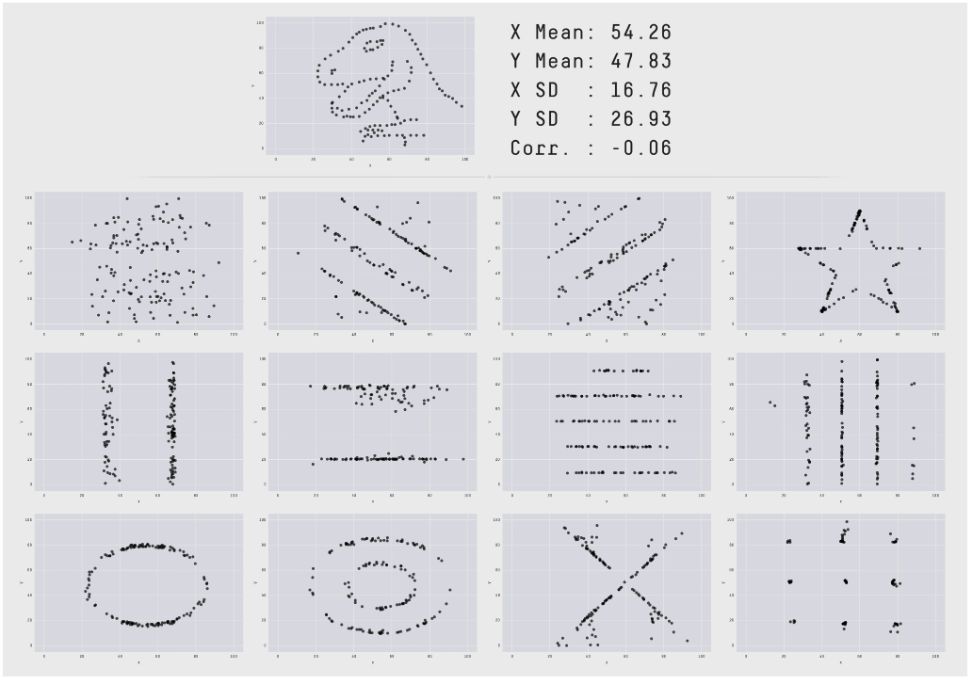

Alll visualizations have the same summary statistics (mean, SD, etc), but they clearly convey very different information! Using visualizations and EDA can reveal details from data that cannot be understood from numerical values alone.


### Common Types of Visualizations

Visualizations are plotted using Matplotlib and Seaborn. Matplotlib lets you customize your plots with greater detail, but Seaborn allows you to easily make more visually appealing plots.

Matplotlib is usually imported as `plt`, while Seaborn is usually imported as `sns`.

I'm creating a `tas` dataframe that will be used for the demos in the code cell below.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

raw_data = {
    "Student ID":    [101, 102, 103, 104, 105, 106, 107, 108, 109, 102],
    "Name":      ["Gina", "Iana", "Kabilan", "Nathan", "Earn", None, "Sameer", "Sarah", "Wayland", "Iana"],
    "Major":         ["Math", "DS", "Math", "DS", "Business", "DS", "economics", "CS", "DS", "Biology"],
    "GPA":           [3.8, 3.7, 3.9, 3.0, 3.6, 3.2, None, 3.1, 3.7, 3.5],
    "Year":          [2, 3, 1, 4, 2, 3, 1, 3, 4, 3],
    "scholarship":   ["yes", "no", "yes", "no", "yes", "no", "yes", "no", None, "no"],
    "Extra Column":  [None] * 10
}
tas = pd.DataFrame(raw_data)
tas

,Student ID,Name,Major,GPA,Year,scholarship,Extra Column
0,101,Gina,Math,3.8,2,yes,None
1,102,Iana,DS,3.7,3,no,None
2,103,Kabilan,Math,3.9,1,yes,None
3,104,Nathan,DS,3.0,4,no,None
4,105,Earn,Business,3.6,2,yes,None
5,106,None,DS,3.2,3,no,None
6,107,Sameer,economics,NaN,1,yes,None
7,108,Sarah,CS,3.1,3,no,None
8,109,Wayland,DS,3.7,4,None,None
9,102,Iana,Biology,3.5,3,no,None


##Histograms
Histograms visualize the distribution of a single *quantitative* variable.

To plot a histogram in Matplotlib, use the structure `plt.hist(x)` where `x` is a series. There are many other optional arguments you can pass into the `plt.hist()` function, and you can read more about them [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) in the matplotlib documentation.

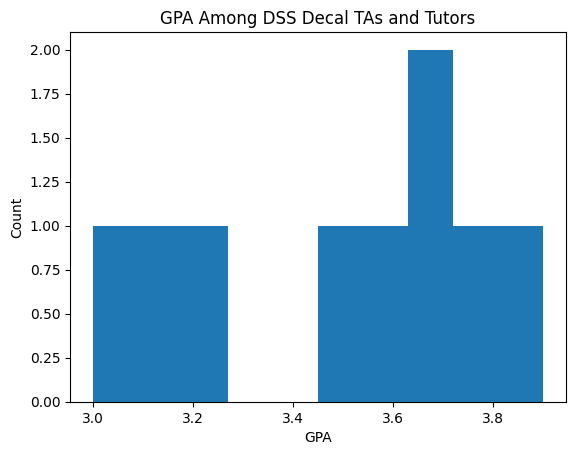

In [ ]:
x = tas['GPA']
plt.hist(x)

# Add labels
plt.xlabel("GPA")
plt.ylabel("Count")
plt.title("GPA Among DSS Decal TAs and Tutors");

## Bar Plots
A bar plot visualizes the distribution of a qualitative (categorical) variable. The length of a bar plot encodes the frequency of a category.

To plot bar plots in Matplotlib, use the structure `plt.bar(x, height)` where `x` is an array / series / index of the category labels and `height` is an array / series / index of the height for each bar (usually counts).

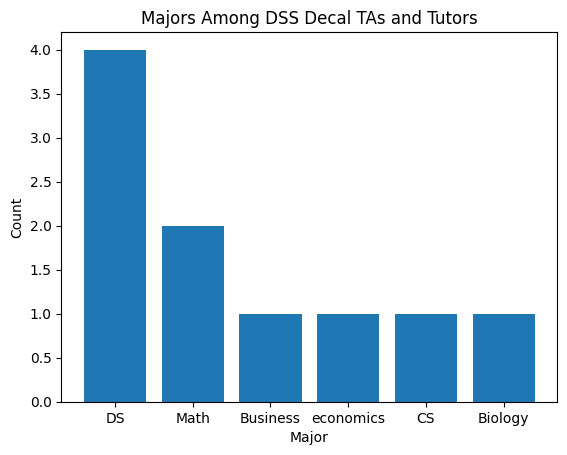

In [ ]:
x = tas['Major'].value_counts()
plt.bar(x.index, x);

# Add labels
plt.xlabel("Major")
plt.ylabel("Count")
plt.title("Majors Among DSS Decal TAs and Tutors");

## Scatter Plot
Scatter plots visualize the relationship between pairs of quantitative variables. They indicate the strength, or correlation, of the relationship between variables.

To plot bar plots in Matplotlib, use the structure `plt.scatter(x, y)` where `x` is an array / series / index of the x-axis variable and `y` is an array / series / index of y-axis variable.

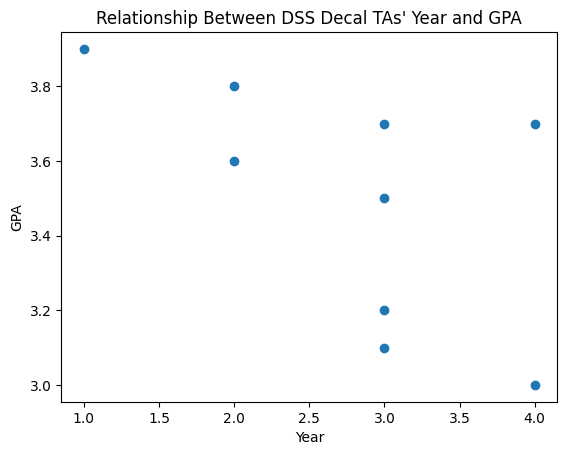

In [ ]:
year = tas['Year']
gpa = tas['GPA']
plt.scatter(year, gpa);

# Add labels
plt.xlabel("Year")
plt.ylabel("GPA")
plt.title("Relationship Between DSS Decal TAs' Year and GPA");

## Line Plots
Line plots visualize how a single *quantitative* variable changes over time.

To plot line plots in Matplotlib, use the structure `plt.plot(x)` where `x` is an array / series / index of the x-axis variable and `y` is an array / series / index of y-axis variable.

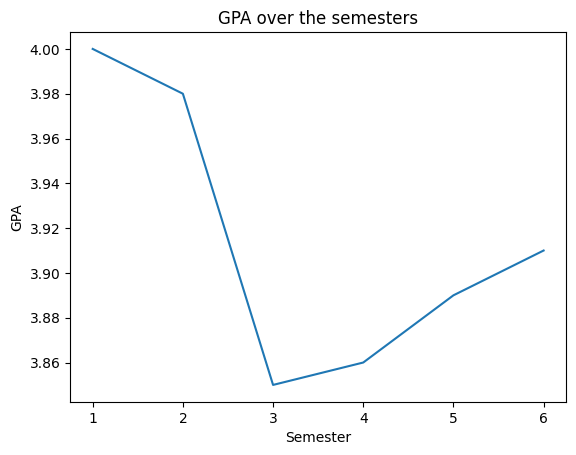

In [ ]:
raw_data = {
    "Semester":      [1, 2, 3, 4, 5, 6],
    "GPA":           [4.00, 3.98, 3.85, 3.86, 3.89, 3.91],
}
gpa_df = pd.DataFrame(raw_data)

plt.plot(gpa_df['Semester'], gpa_df['GPA']);

# Add labels
plt.xlabel("Semester")
plt.ylabel("GPA")
plt.title("GPA over the semesters");